In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from pymc import *
import pymcmcstat
from girth_mcmc import GirthMCMC

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
TABLE_FILE = 'test.pick'
mycat = pd.read_pickle(TABLE_FILE)

FileNotFoundError: [Errno 2] No such file or directory: 'test.pick'

NameError: name 'mycat' is not defined

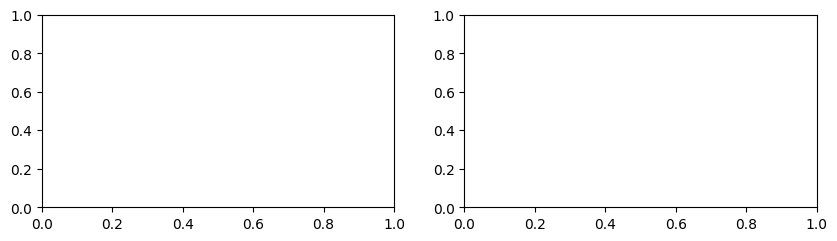

In [4]:
fig,ax = plt.subplots(1,2, figsize=(10,2.5))
plt.subplot(121)
plt.scatter(mycat['Y'], -1*mycat['X'], s=8,
color=plt.cm.viridis_r(10**(mycat.Zmag-mycat.Zmag.max()) ),edgecolor='None')
plt.xlabel('Y (Mpc)'); plt.ylabel('X (Mpc)')
ax = plt.gca()
despine(ax)
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)
plt.axis('equal')
plt.subplot(122)
c_arr = 10**(mycat.Zmag-mycat.Zmag.max())
plt.scatter(-1*mycat['X'],mycat['Z'],s=8, color=plt.cm.viridis_r(c_arr), edgecolor='None')
lstyle = dict(lw=1.5, color='k', dashes=(6,4))
ax = plt.gca()
despine(ax)
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)
plt.plot([0,150], [0,80], **lstyle)
plt.plot([0,150], [0,45], **lstyle)
plt.plot([0,-25], [0,80], **lstyle)
plt.plot([0,-25], [0,45], **lstyle)
plt.xlabel('X (Mpc)'); plt.ylabel('Z (Mpc)')
plt.subplots_adjust(wspace=0.3)
plt.axis('equal');
plt.ylim((-10,110));


In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [6]:
A = np.array([mycat['Y'], -1*mycat['X'], mycat['Z']]).T
A_scaled = StandardScaler().fit_transform(A)
dbout = DBSCAN(eps=0.15, min_samples=5).fit(A_scaled)

NameError: name 'mycat' is not defined

In [7]:
(dbout.labels_==-1).any()

NameError: name 'dbout' is not defined

In [ ]:
csmask = np.zeros_like(dbout.labels_, dtype=bool)
csmask[dbout.core_sample_indices_] = True
unique_labels = set(dbout.labels_)

In [ ]:
n_clusters = len(set(labels)) - [0,1][-1 in labels]
print('Estimated number of clusters: %d' % n_clusters)
print("Silhouette Coefficient: %0.3f"
% metrics.silhouette_score(A_scaled, dbout.labels_))

In [8]:
colors = plt.cm.viridis(np.linspace(0.3, 1, len(unique_labels)))
np.random.seed(0)
np.random.shuffle(colors)
for lbl, col in zip(unique_labels, colors):
    if lbl == -1:
        # Black used for noise.
        col = 'DarkRed'; m1=m2= '+'; s = 10; a = 0.5
    else:
        m1='.';m2='.'; s=5; a=1
    cmmask = (dbout.labels_ == lbl)
    xy = A[cmmask & csmask]       
    plt.scatter(xy[:, 0], xy[:, 1], color=col,
        marker=m1, s=s+1,         alpha=a)
    xy = A[cmmask & ~csmask]
    plt.scatter(xy[:, 0], xy[:, 1], color=col, marker=m2, s=s-2, alpha=a)
despine(plt.gca())
noiseArtist = plt.Line2D((0,1),(0,0), color='DarkRed', marker='+', linestyle='', ms=4, mew=1, alpha=0.7)
clusterArtist = plt.Line2D((0,1),(0,0),
color='k', marker='.', linestyle='', ms=4, mew=1)
plt.legend([noiseArtist, clusterArtist], ['Outliers','Clusters'], numpoints=1)
plt.title('A slice of the Universe')
plt.xlabel('X [Mpc]')
plt.ylabel('Y [Mpc]')

NameError: name 'unique_labels' is not defined